In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
all_women = train_data.loc[train_data.Sex == 'female']["Survived"]
survived_women = sum(all_women)
rate_women = survived_women/len(all_women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


Text(0.5, 1.0, 'Female')

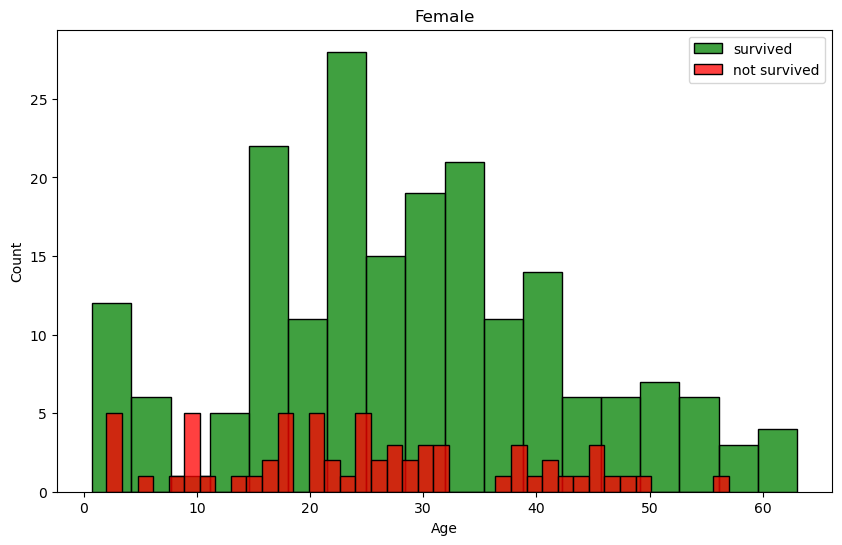

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
survived = 'survived'
not_survived = 'not survived'

women = train_data[train_data['Sex'] == 'female']

plt.figure(figsize=(10, 6))

ax = sns.histplot(women[women['Survived'] == 1].Age.dropna(), bins=18, label=survived, kde=False, color="green")
ax = sns.histplot(women[women['Survived'] == 0].Age.dropna(), bins=40, label=not_survived, kde=False, color="red")

ax.legend()
ax.set_title('Female')


In [6]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


Text(0.5, 1.0, 'Male')

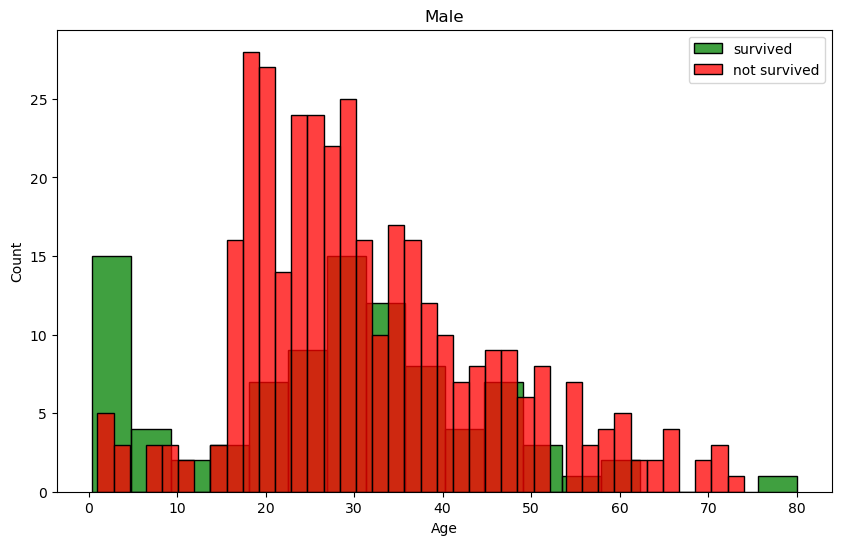

In [7]:
men = train_data[train_data['Sex'] == 'male']

plt.figure(figsize=(10, 6))

ax = sns.histplot(men[men['Survived'] == 1].Age.dropna(), bins=18, label=survived, kde=False, color="green")
ax = sns.histplot(men[men['Survived'] == 0].Age.dropna(), bins=40, label=not_survived, kde=False, color="red")

ax.legend()
ax.set_title('Male')

1 等座的生存率为: 0.6296296296296297
2 等座的生存率为: 0.47282608695652173
3 等座的生存率为: 0.24236252545824846


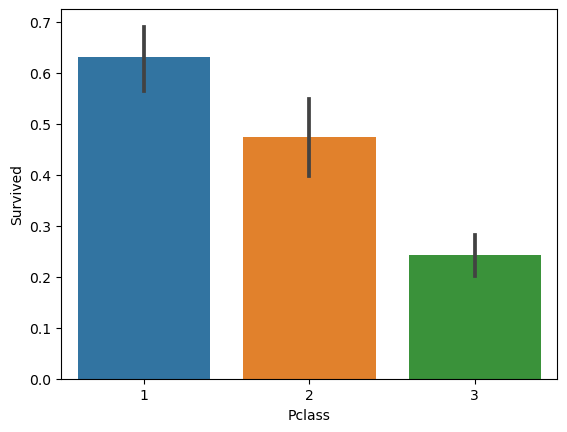

In [8]:
# i 等座的存活率
for pclass in range(1, 4):
    P_Sv = train_data.loc[train_data.Pclass == pclass]["Survived"]
    rate = sum(P_Sv) / len(P_Sv)
    print(f"{pclass} 等座的生存率为: {rate}")
    
sns.barplot(x='Pclass', y='Survived', data=train_data);

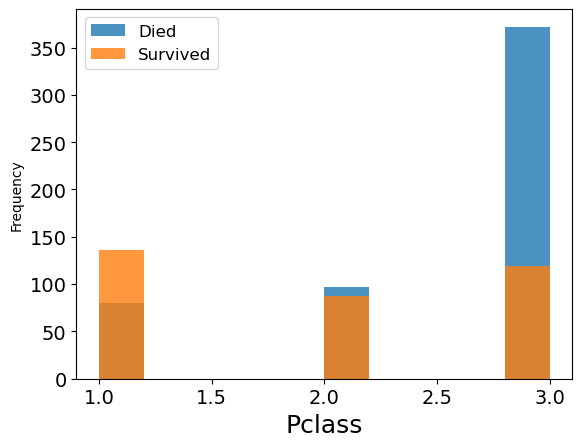

In [9]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

plt.figure()
fig = train_data.groupby('Survived')['Pclass'].plot.hist(histtype= 'bar', alpha = 0.8)
plt.legend(('Died','Survived'), fontsize = 12)
plt.xlabel('Pclass', fontsize = 18)
plt.show()

In [10]:
import plotly.express as px
for template in ["plotly_dark"]:
    fig = px.scatter(train_data,
                     x="PassengerId", y="Survived", color="Survived",
                     log_x=True, size_max=20,
                     template=template, title="Survived or Died?")
    fig.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier

# 标签
y = train_data["Survived"].loc[~train_data["Age"].isnull()]
print(len(y))
features = ["Pclass","Age","Sex","SibSp","Parch"]
X = pd.get_dummies(train_data[features]) # 训练数据
# 去除Age中的NaN值
X = X.dropna(subset=['Age'])
print(X)
X_test = pd.get_dummies(test_data[features])
X_test["Age"].fillna(25, inplace=True)

#n_estimators：表示随机森林中的决策树数量，这里设置为100。
# max_depth：表示每个决策树的最大深度，这里设置为5。
# random_state：随机数生成器的种子值，用于控制模型的随机性，这里设置为1，以保证结果的可重复性。

# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model.fit(X,y) # fit()方法训练后的模型model将可以用于在测试数据上进行预测。

# # 预测
# predictions = model.predict(X_test)


# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# output

714
     Pclass   Age  SibSp  Parch  Sex_female  Sex_male
0         3  22.0      1      0           0         1
1         1  38.0      1      0           1         0
2         3  26.0      0      0           1         0
3         1  35.0      1      0           1         0
4         3  35.0      0      0           0         1
..      ...   ...    ...    ...         ...       ...
885       3  39.0      0      5           1         0
886       2  27.0      0      0           0         1
887       1  19.0      0      0           1         0
889       1  26.0      0      0           0         1
890       3  32.0      0      0           0         1

[714 rows x 6 columns]


#  调参

In [12]:
from sklearn.model_selection import GridSearchCV

# 创建随机森林分类器模型
model = RandomForestClassifier()

param_test1 = {
    'n_estimators': [100,200,500,750,1000],
    'max_depth': [3,5,7,9],
}

# 设置参数网格搜索范围
param_grid = param_test1

# 创建网格搜索对象
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# 在训练数据上进行参数搜索
grid_search.fit(X, y)

# 输出最佳参数和对应的分数
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# 使用最佳参数训练模型
best_model = grid_search.best_estimator_
best_model.fit(X, y)

# 预测
predictions = best_model.predict(X_test)

# 生成提交文件
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)


Best parameters found:  {'max_depth': 5, 'n_estimators': 200}
Best score:  0.8250172362848419
